<div align="center"> 

---

# **Manuscript Figures**

</div>

----

<div align="center"> 


</div>

---
# <u> **Description:**</u>

Visualization for manuscript figures.

---

### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=16, repr.plot.height=14) # to resize plots

2 
2

In [15]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,devtools,ggpubr,ggthemes,png,grid,gridExtra)


#### Load Data

In [3]:
setwd("../")

In [4]:
load("Data/Alcohol_consumption.RData")

In [5]:
load("Data/Behavior_metricsEPM.RData")

In [6]:
load("Data/Behavior_metricsNOR.RData")

In [ ]:
RID_group <- read_csv("Data/RID.csv")
Class_group <- read_csv("Data/Class.csv")

In [8]:
RID_class <- RID_group %>% left_join(Class_group[-3], by ="RID") %>% mutate(Intake = case_when(class == "Low" ~ class, 
                                                                            class == "High" ~ class, Group == "Ctrl" ~ "Ctrl",
                                                                            Group == "Ctrl+Ctrl" ~ "Ctrl")) %>% select(-c("class"))
RID_class %>% write_csv("Data/RID_Group_class.csv")

In [ ]:
DBM_dataset <- read_csv("Data/MRI/DBM/DBM_dataset.csv") %>% select(-c("Intake")) %>% left_join(RID_class %>% select(RID,Intake), by = c("RID") ) %>%
    mutate(Intake = case_when(Group != "NA" ~ Intake))
DBM_dataset %>% write_csv("Data/MRI/DBM/DBM_dataset.csv")

### **Figure for Design**

In [71]:
# Read png files
Design <- readPNG("Figures/Design/ModelDesign_IA2BC.png")


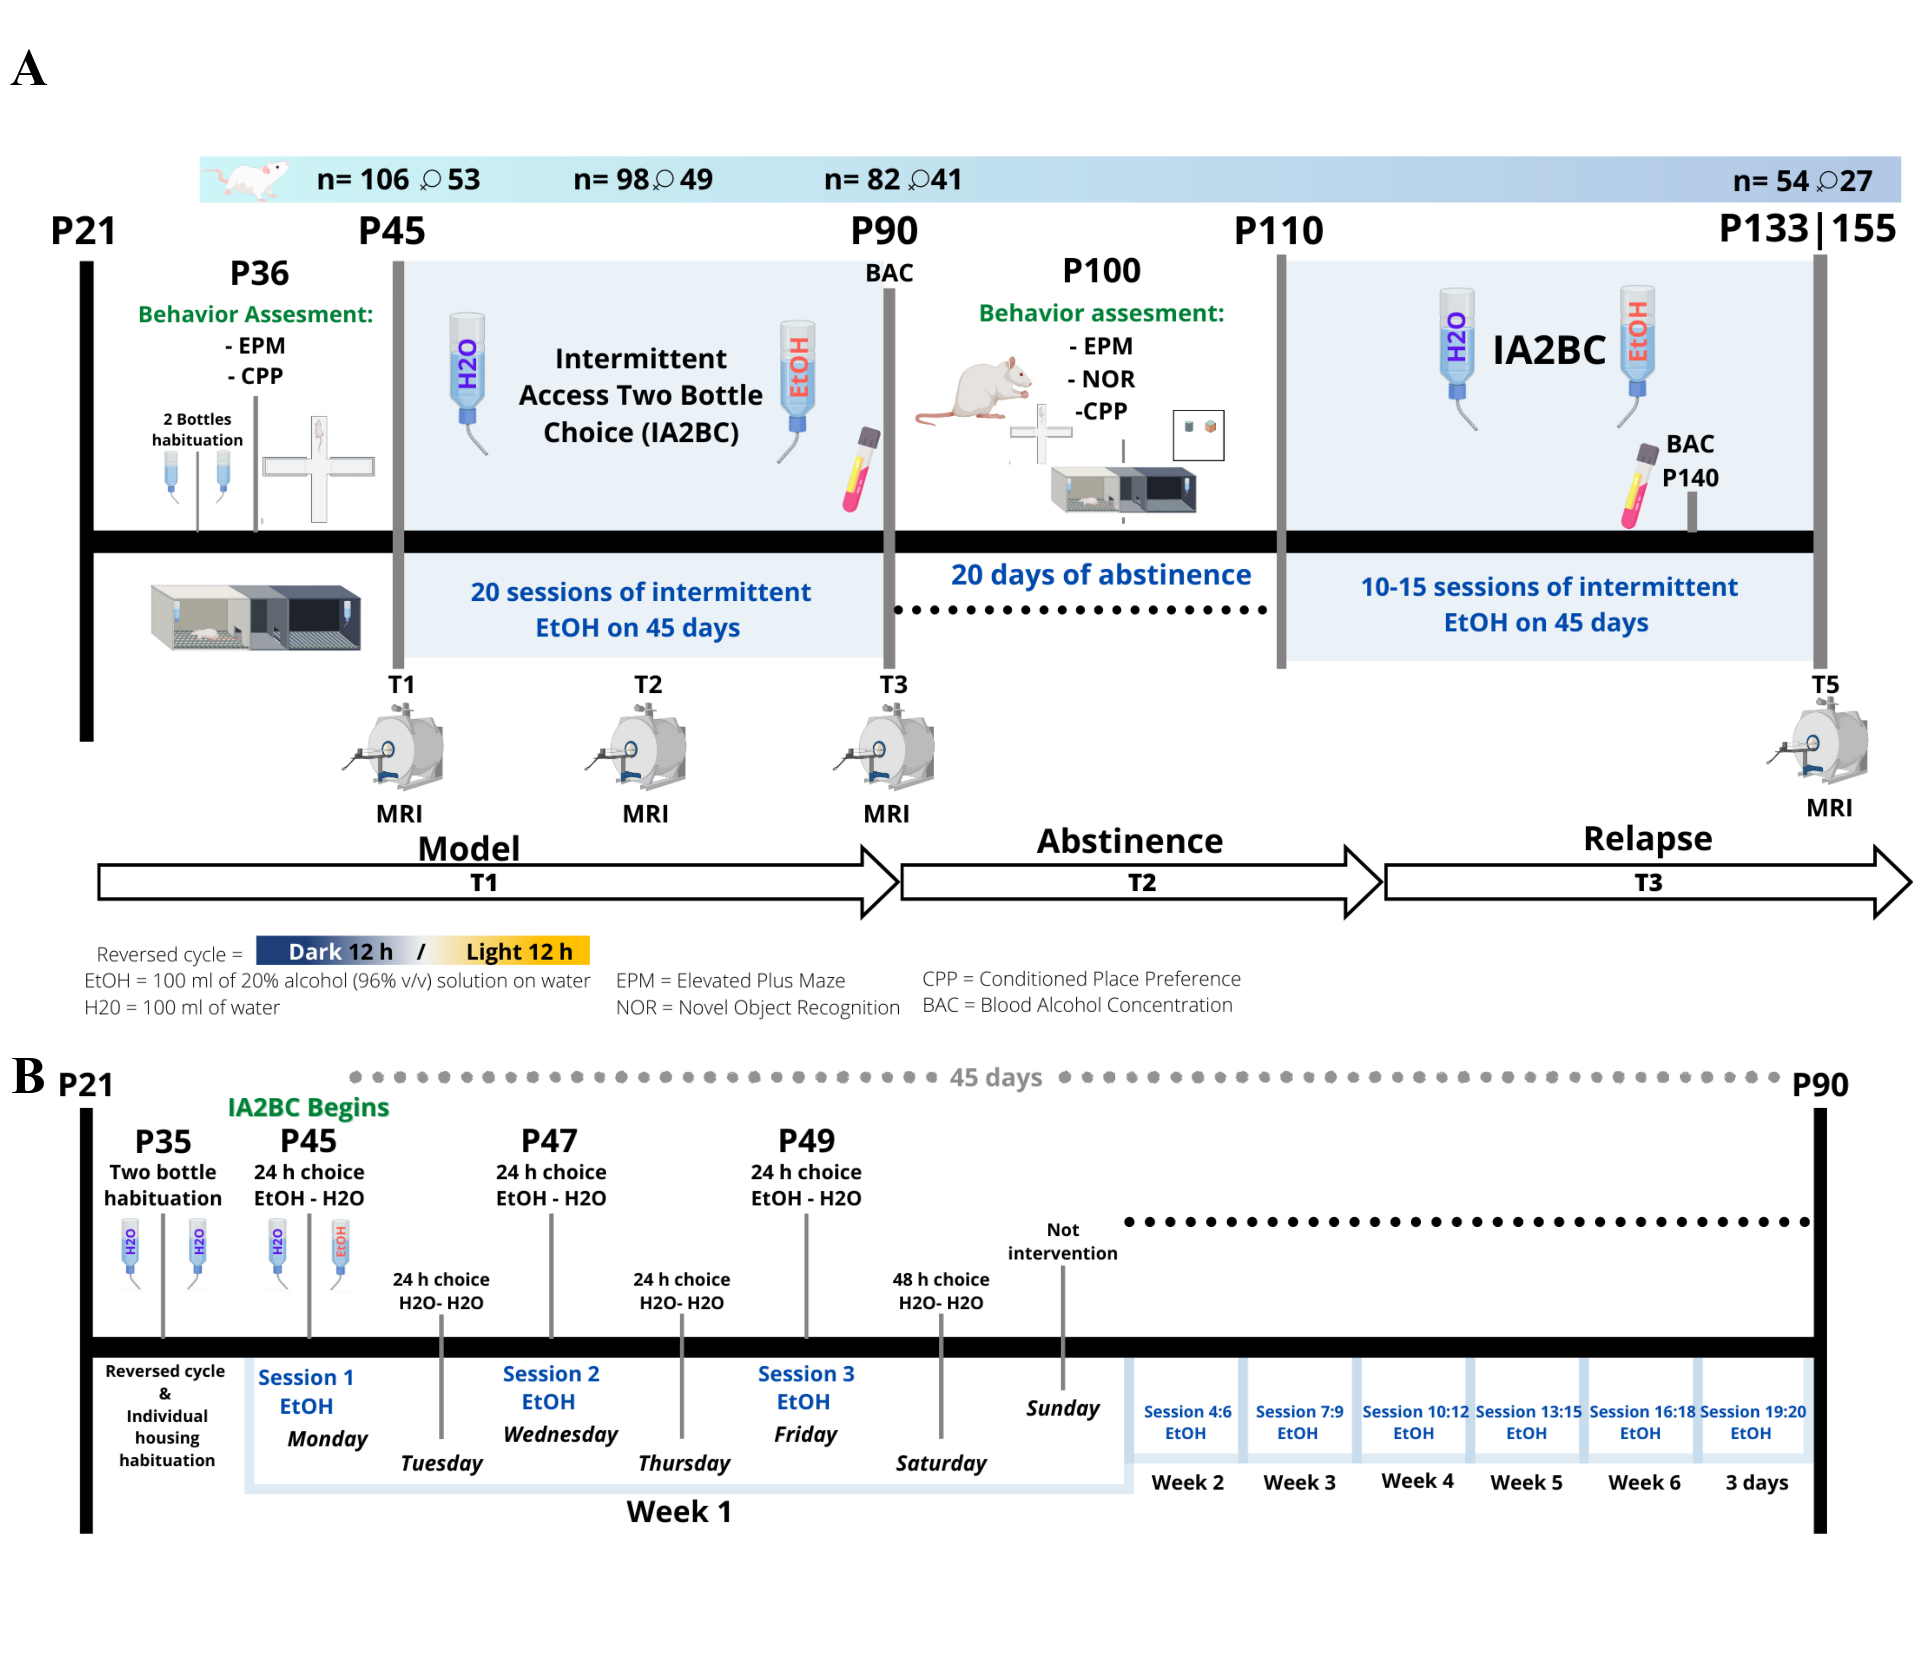

In [82]:
Fig.Design <- ggarrange(rasterGrob(Design)) +
    annotate(geom = "text", x = 0.015, y = 0.96,label = "A", size = 11, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.015, y = 0.36,label = "B", size = 11, fontface = 2, family = "Times New Roman")
Fig.Design

### **Figure for Model results**

In [9]:
# Read png files
Poly1 <- readPNG("Figures/Results_Models/Poly_1.png")
Poly2 <- readPNG("Figures/Results_Models/Poly_2.png")

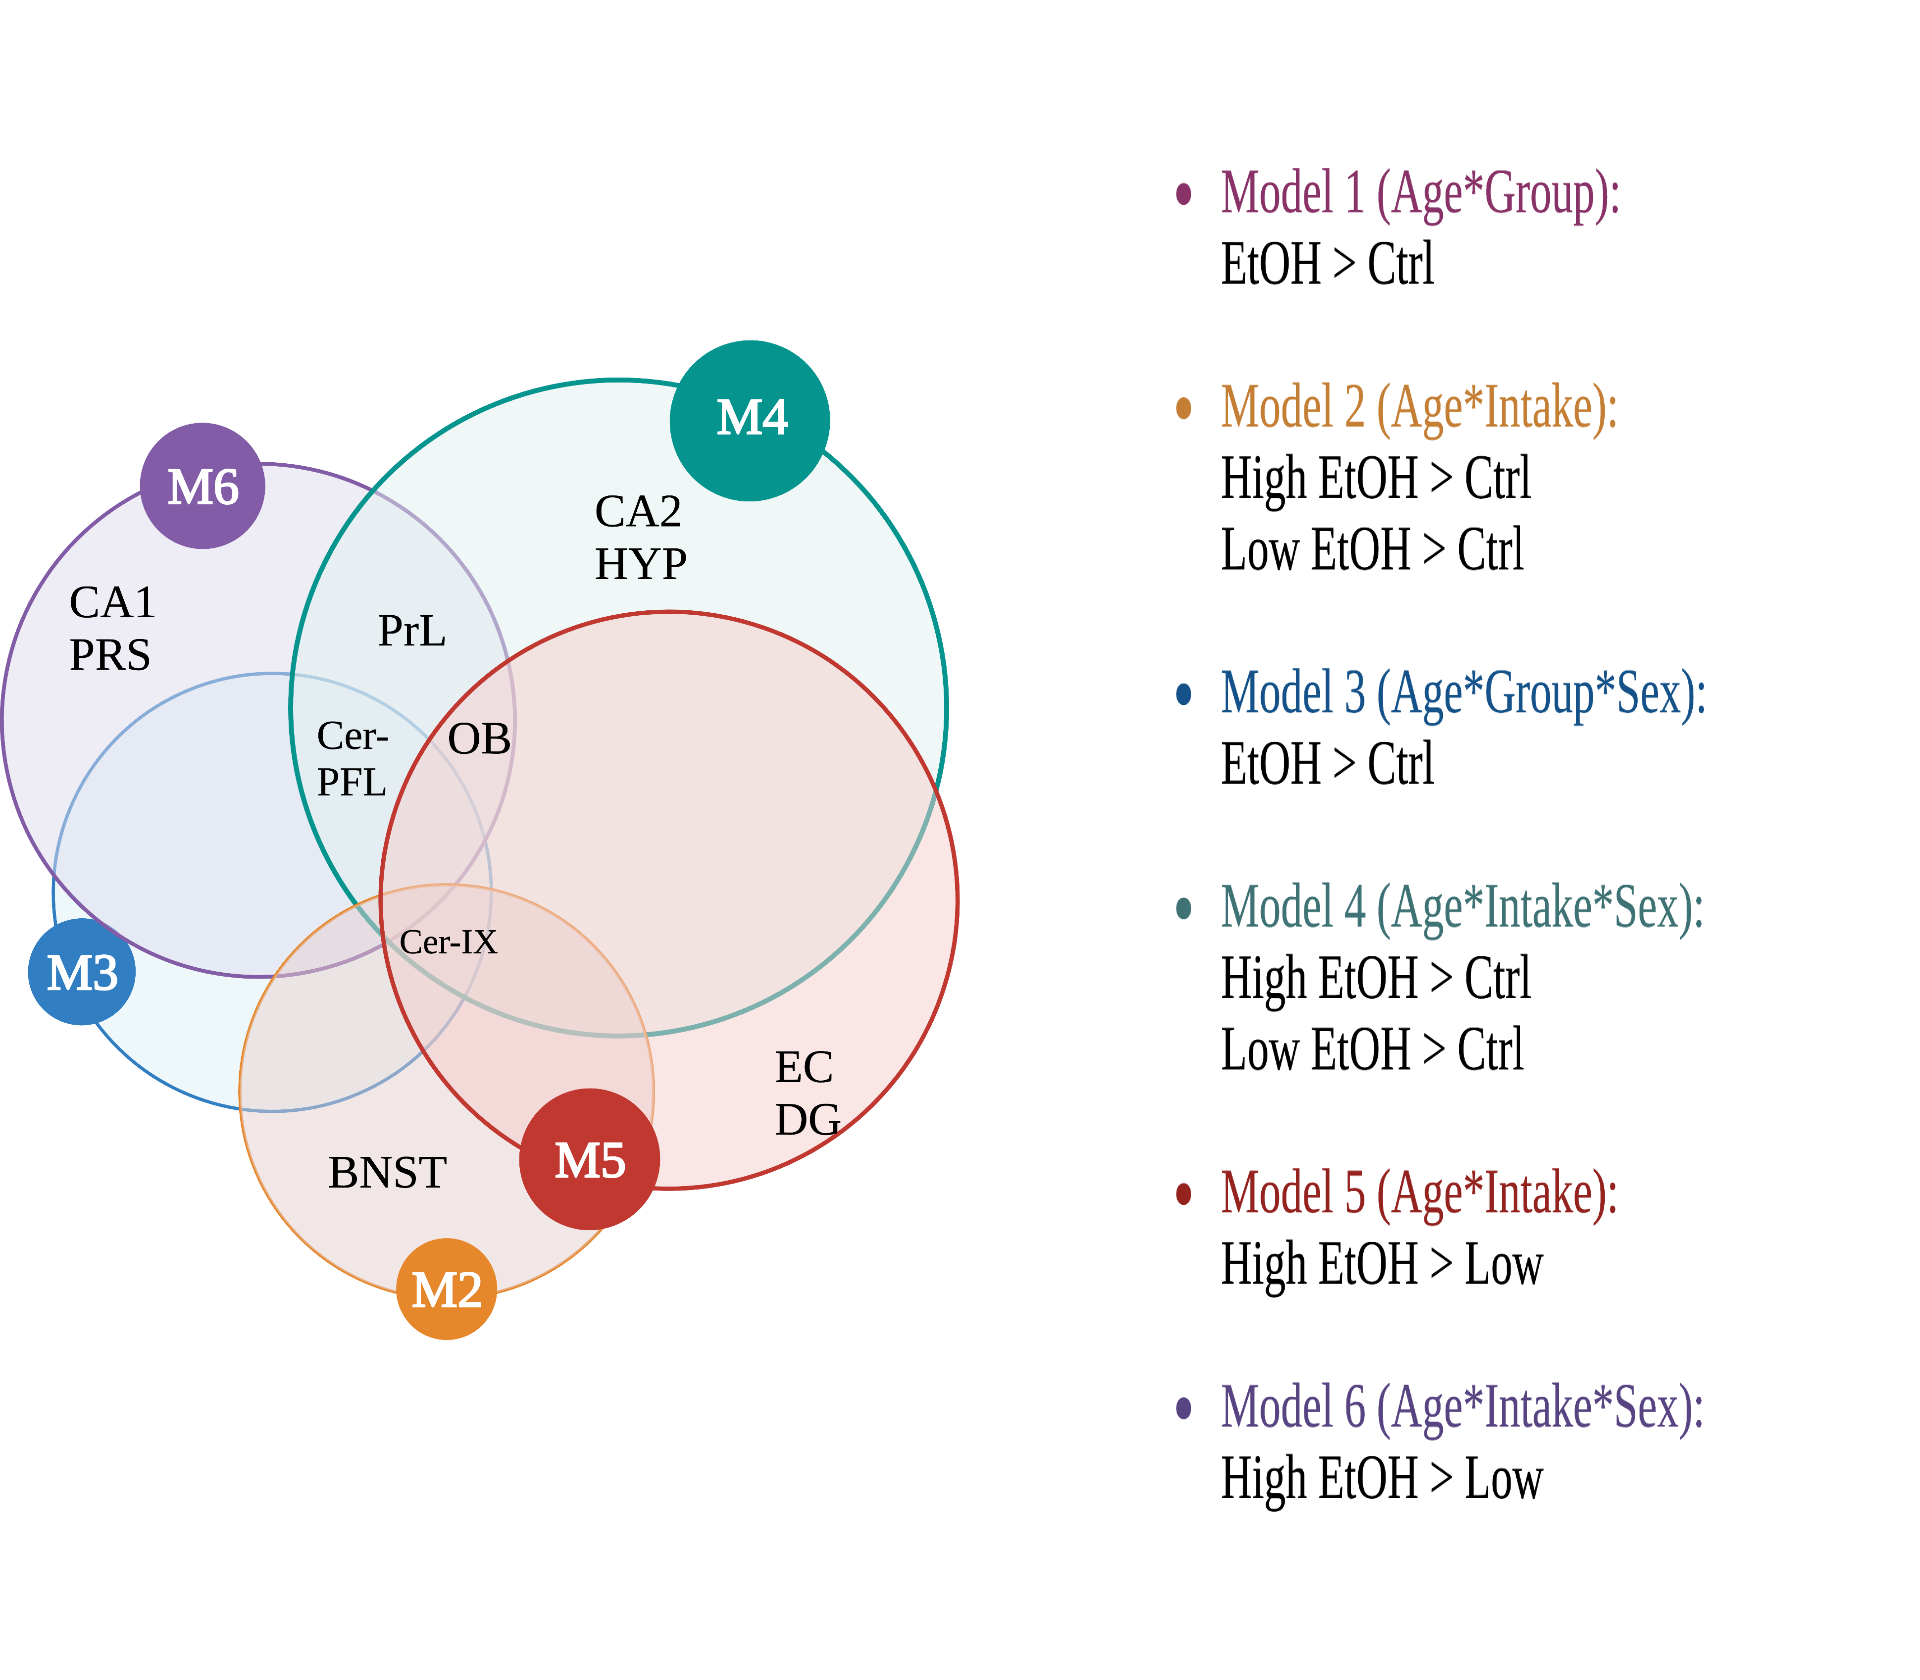

In [31]:
Fig.poly <- ggarrange(rasterGrob(Poly1),rasterGrob(Poly2,width = 0.55, height = 0.8))
Fig.poly

### **Figure for Alcohol consumption**

In [60]:
data_ends <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(class,Session) %>% summarise(main_intake = mean(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)

`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


In [61]:
plot_class.Model <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][4]," %)"), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][2], " %)"), 
                             class == "All" ~ "All")) %>% filter(Phase == "Model") %>%
    ggline(x = "Session", y =  "main_intake", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Main intake (g/kg/24 hrs)", xlab = "Sessions") +
    annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(11) , ymax=c(11.5), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 10, y = 11.25,label = "IA2BC phase", size = 5, fontface = 2) +
  theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
        #axis.text.x.bottom = element_text(margin = margin(b = 10)),
        axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
        legend.text = element_text(size=21, family = "Times New Roman")) + theme_settings 
plot_class.Model <- ggpar(plot_class.Model,ylim = c(0,11))

In [62]:
plot_class.Relapse <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][4]," %)"), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][2], " %)"), 
                             class == "All" ~ "All")) %>% filter(Phase == "Relapse") %>%
    ggline(x = "Session", y =  "main_intake", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Main intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(11) , ymax=c(11.5), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 8, y = 11.25,label = "Relapse phase", size = 5, fontface = 2) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends)) +
    annotate(geom = "point", x = 15, y = 7.858, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 4.363, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 2.266, colour = "orange", size = 3) +
    theme(axis.title.y.left = element_blank(),axis.text.y.left = element_blank(),
          axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
          axis.line.y = element_blank(),axis.ticks.y = element_blank() ) + 
    theme_settings
plot_class.Relapse <- ggpar(plot_class.Relapse,ylim = c(0,11))

In [63]:
plot_ADE <- ggline(ADE, x = "Session", y =  "ADE", group = "class",
              add = c("mean_se", "jitter"), point.size = 4, 
              size=2, color = "class", palette = pal_group[2:3],
              xlab = "Sessions", ylab = "ADE index") +
            theme(legend.position = "none",
              axis.text.y.left = element_text(margin = margin(l = 10)),
        axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) ) + 
            theme_settings

In [64]:
BEC_female <- ggscatter(BEC %>% filter(Sex == "Female"), x = "g/kg/240min", y = "BEC (ng/ul)",
    add = "reg.line", conf.int = TRUE, color = pal_sex[1], add.params = list(color = pal_sex[1], fill = "lightgray")) +
    theme(axis.text.y.left = element_text(margin = margin(l = 10)),
          axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) ) + theme_settings
BEC_male <- ggscatter(BEC %>% filter(Sex == "Male"), x = "g/kg/240min", y = "BEC (ng/ul)",
    add = "reg.line", conf.int = TRUE, color = pal_sex[2], add.params = list(color = pal_sex[2], fill = "lightgray")) + theme_settings +
    theme(axis.title.y = element_blank(),
          axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) )

In [ ]:
leg <- get_legend(ggscatter(BEC, x = "g/kg/240min", y = "BEC (ng/ul)",color = "Sex",
                  add = "reg.line", conf.int = TRUE, palette = pal_sex, add.params = list(fill = "lightgray")) + 
                  theme_settings + theme(legend.text = element_text(size = 20)) )

#### Arranging plots

In [66]:
plot_clss <- ggarrange(plot_class.Model, plot_class.Relapse, ncol = 2, common.legend = T)

In [ ]:
plot_BEC1 <- ggarrange(BEC_female,BEC_male,widths = c(1,0.95)) + theme_settings
plot_BEC <- ggarrange(as_ggplot(leg),plot_BEC1,ncol = 1, heights = c(0.2,1.8))

In [68]:
Fig.Consumption1 <- ggarrange(plot_ADE,plot_BEC, labels = c("B","C"), widths = c(0.9,1.2),
                              font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))

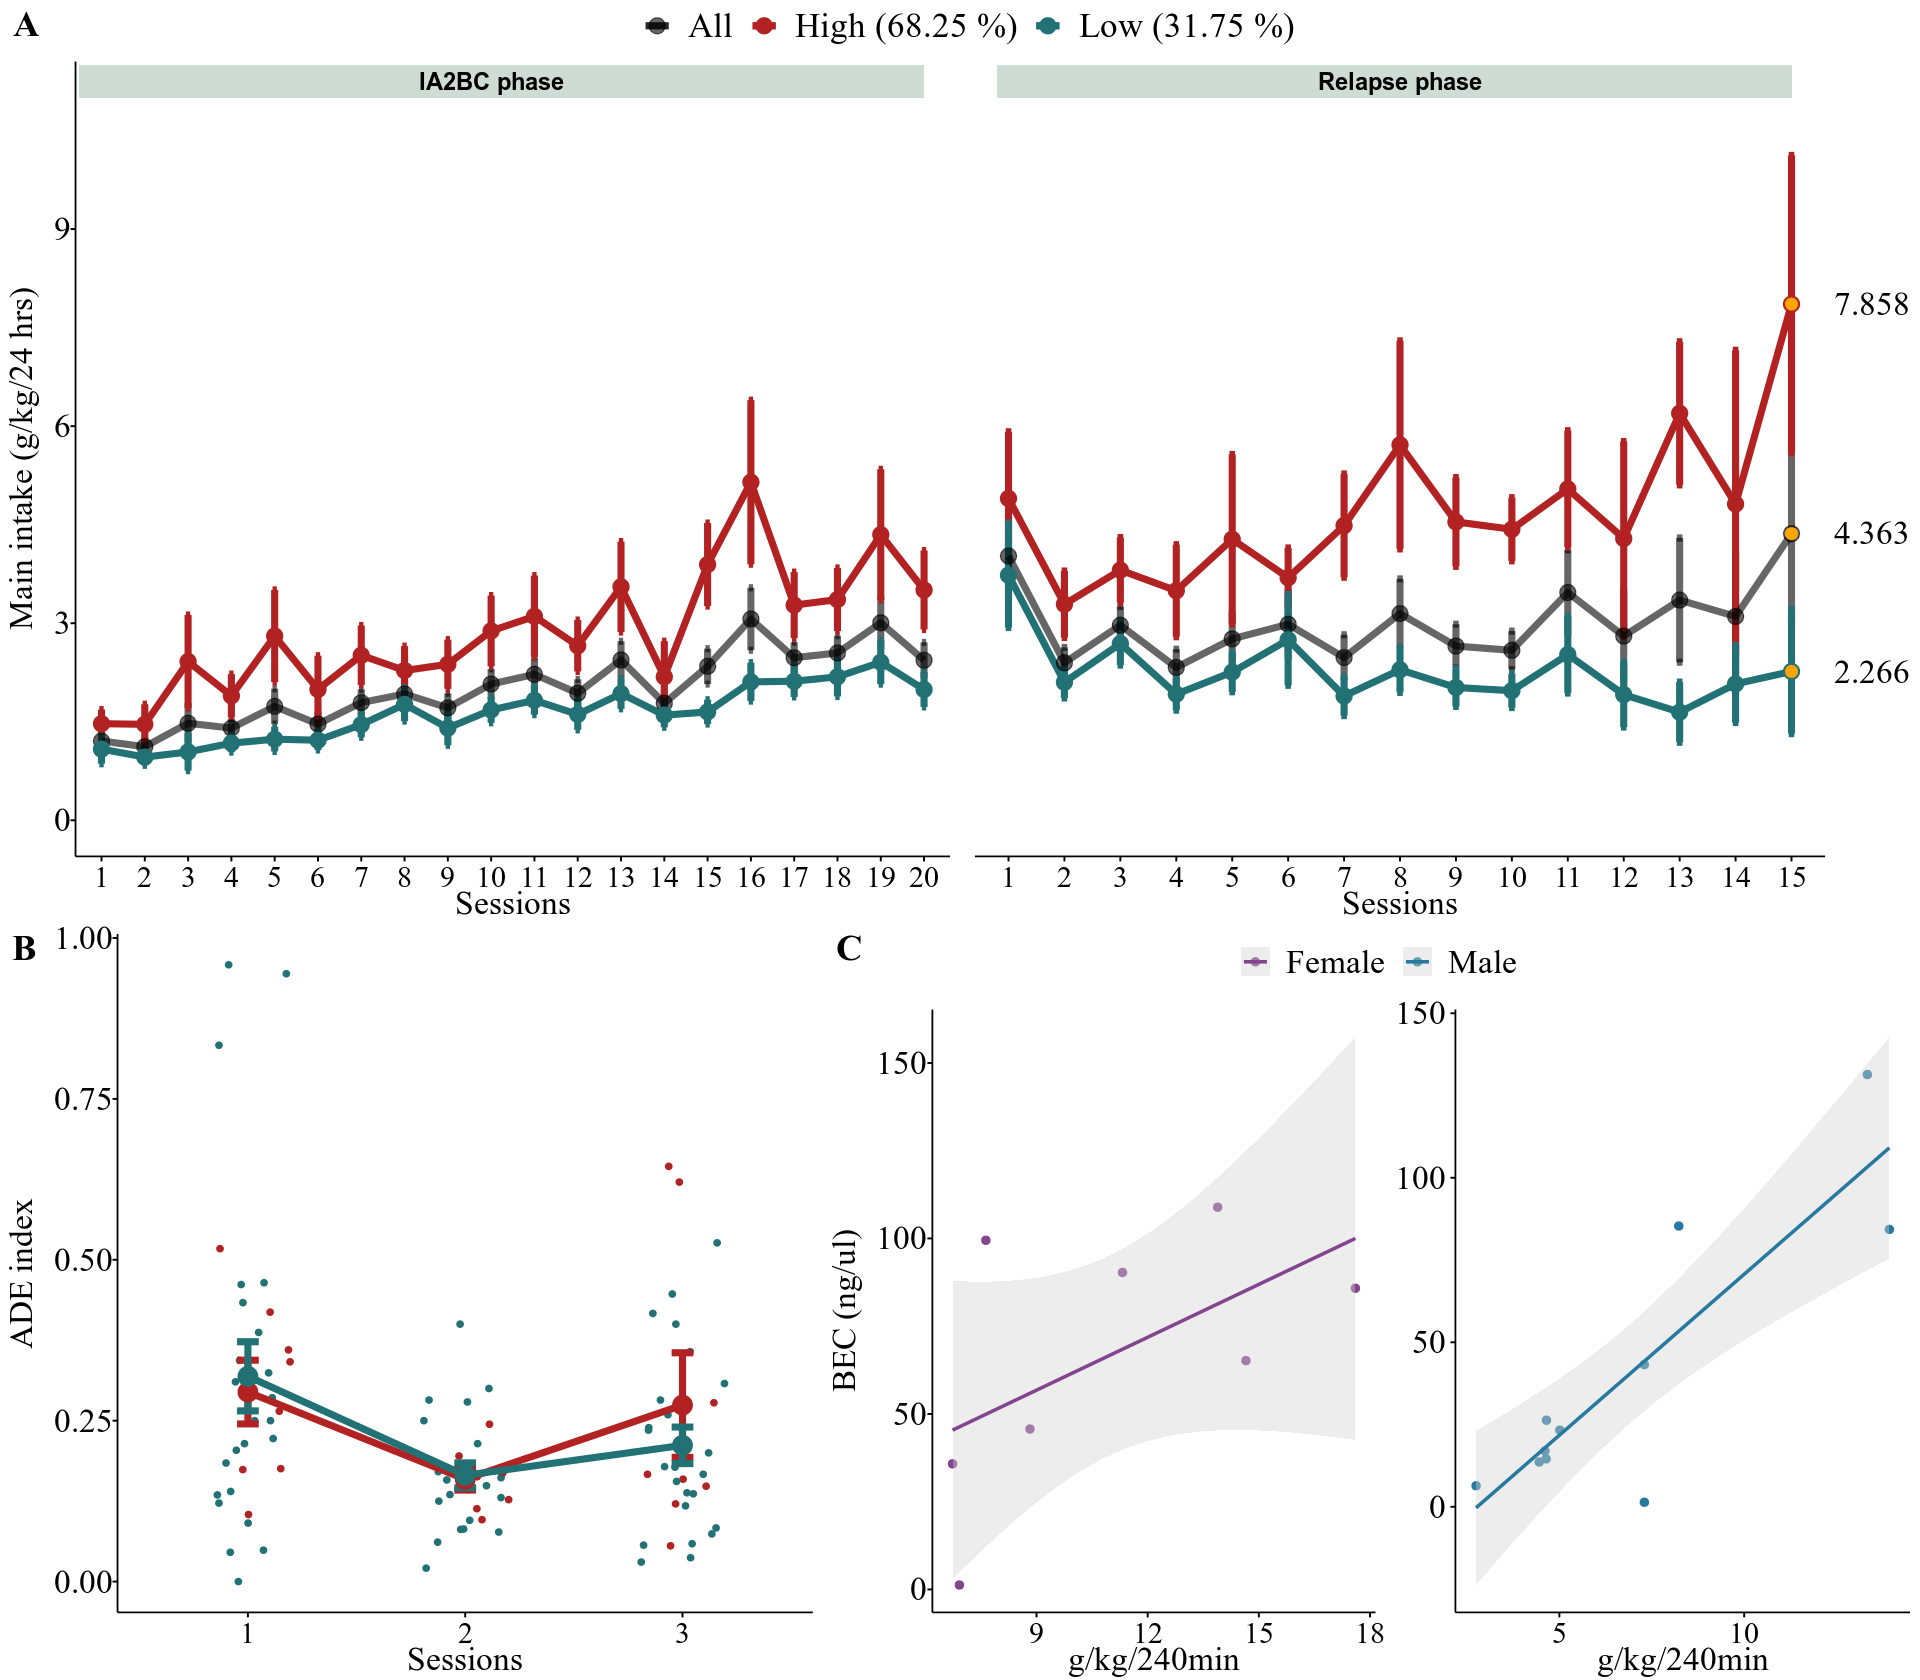

In [69]:
Fig.Consumption <- ggarrange(plot_clss, Fig.Consumption1, ncol = 1, labels = c("A"), heights = c(1.1,0.9),
                             font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
Fig.Consumption

### **Figures of Behavior**

#### Deeplabcut labels

In [23]:
# Read png files
img <- readPNG("Figures/DLC/Labels.png")

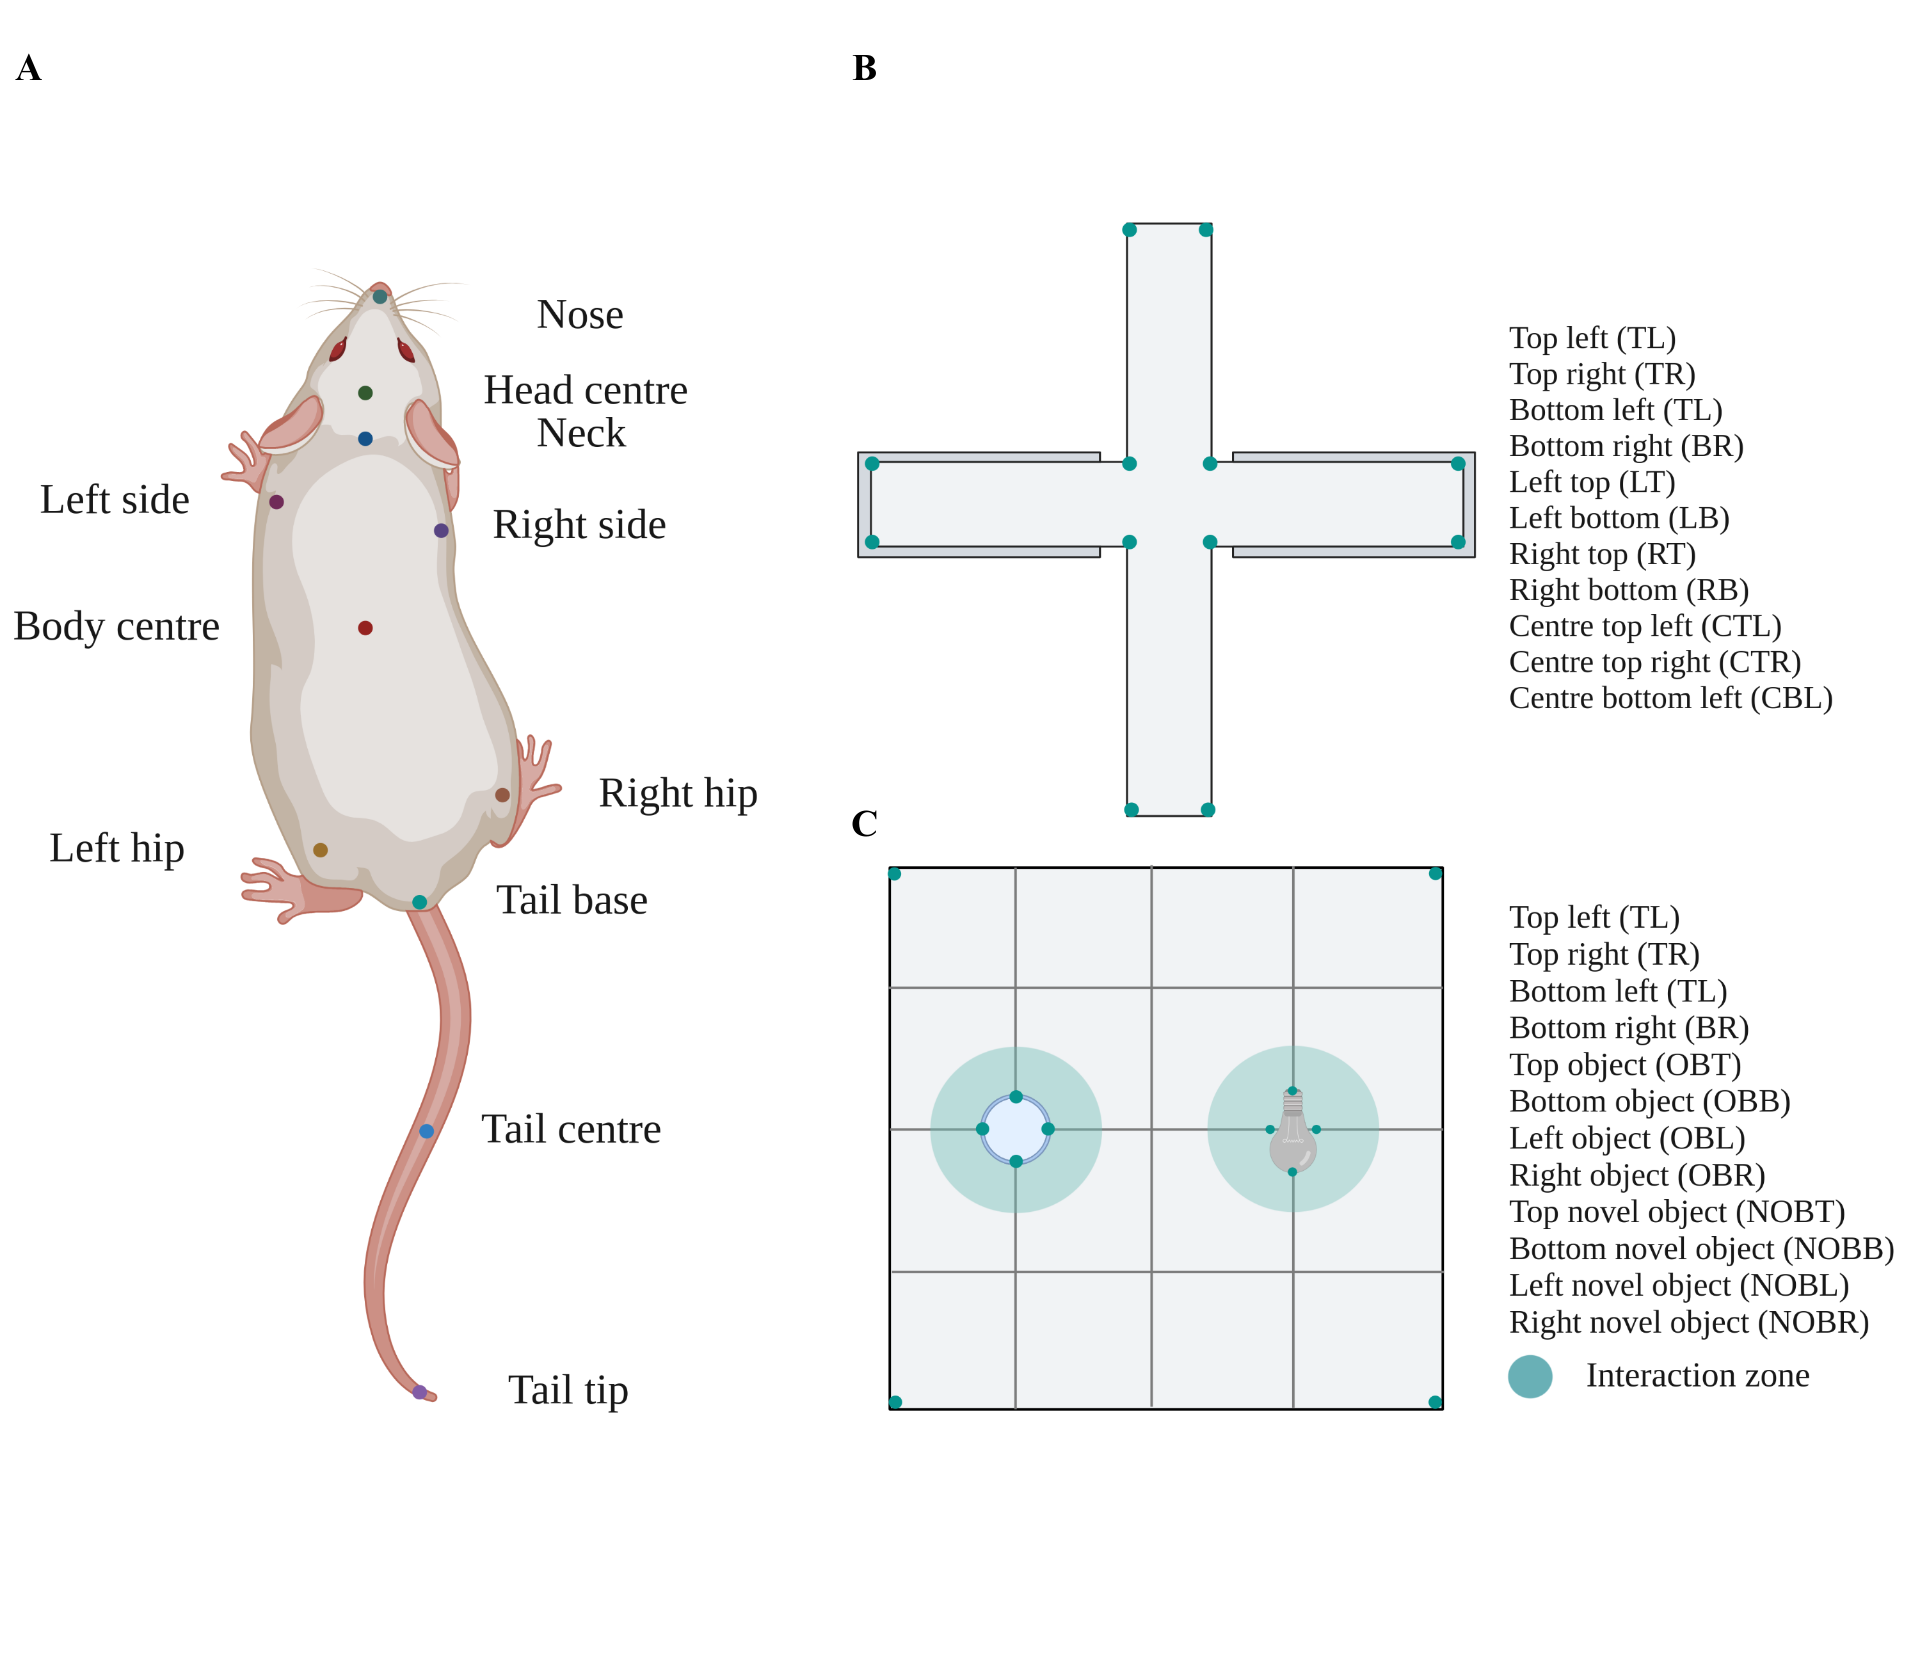

In [24]:
Fig.DLC <- ggarrange(rasterGrob(img)) +
    annotate(geom = "text", x = 0.015, y = 0.96,label = "A", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.51,label = "C", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.96,label = "B", size = 8, fontface = 2, family = "Times New Roman")
Fig.DLC

In [18]:
EPM <- EPM_AI %>% select(RID,Group,class,Sex,Stage,Anxiety_index)
NOR <- NOR_II %>% select(RID,PI) %>% rename("Preference_index" = "PI")

Behav <- EPM %>% left_join(NOR,by = "RID")

In [19]:
Behavior <- Behav %>% filter(Stage == "T2") %>%
    pivot_longer(c(Anxiety_index,Preference_index),names_to = "Behavior",values_to = "Behavior Score") %>%
    mutate(Behavior = factor(Behavior))

In [20]:
Behavior3 = Behavior %>% mutate(Behavior_sex = case_when(Behavior == "Anxiety_index" & Sex == "female" ~ "Anxiety_index_fem",
                                Behavior == "Anxiety_index" & Sex == "male" ~ "Anxiety_index_male",
                                Behavior == "Preference_index" & Sex == "female" ~ "Preference_index_fem",
                                Behavior == "Preference_index" & Sex == "male" ~ "Preference_index_male"), .before = 7) %>%
            mutate(Behavior_sex = factor(Behavior_sex))

In [21]:
Fig.Behavior_bars <- ggbarplot(Behavior3, x = "Behavior_sex", y = "Behavior Score",
          fill = "class",
          add = "mean_se",
          color = "black",
          position = position_dodge(),
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=3.5,y=-0.13,label="NOR\nPreferency\nIndex", size = 6, family = "Times New Roman") +
    annotate("text",x=1.5,y=-0.13,label="Anxiety\nIndex", size = 6, family = "Times New Roman") + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(0.95) , ymax=c(1), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(0.95) , ymax=c(1), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(0.95) , ymax=c(1), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(0.95) , ymax=c(1), alpha=0.5, fill=pal_sex[2]) +
    annotate(geom = "text", x = 1, y = 0.975,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 0.975,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 0.975,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 0.975,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate("segment", x = 1.0, xend = 2.0, y = 0.74, yend = 0.74, colour = "black", linetype=1) +
    annotate("segment", x = 1.0, xend = 1.7, y = 0.69, yend = 0.69, colour = "black", linetype=1) +
    annotate("segment", x = 0.7, xend = 1.7, y = 0.84, yend = 0.84, colour = "black", linetype=1) +
    annotate("segment", x = 1.0, xend = 2.3, y = 0.79, yend = 0.79, colour = "black", linetype=1) +
    annotate(geom = "text", x = 1.2, y = 0.855,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.7, y = 0.805,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.5, y = 0.755,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.35, y = 0.705,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    theme(axis.title.y = element_blank(), text = element_text(size=20, family = "Times New Roman"), 
          legend.text = element_text(size=19, family = "Times New Roman"),legend.title=element_blank(),
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



Coordinate system already present. Adding new coordinate system, which will replace the existing one.



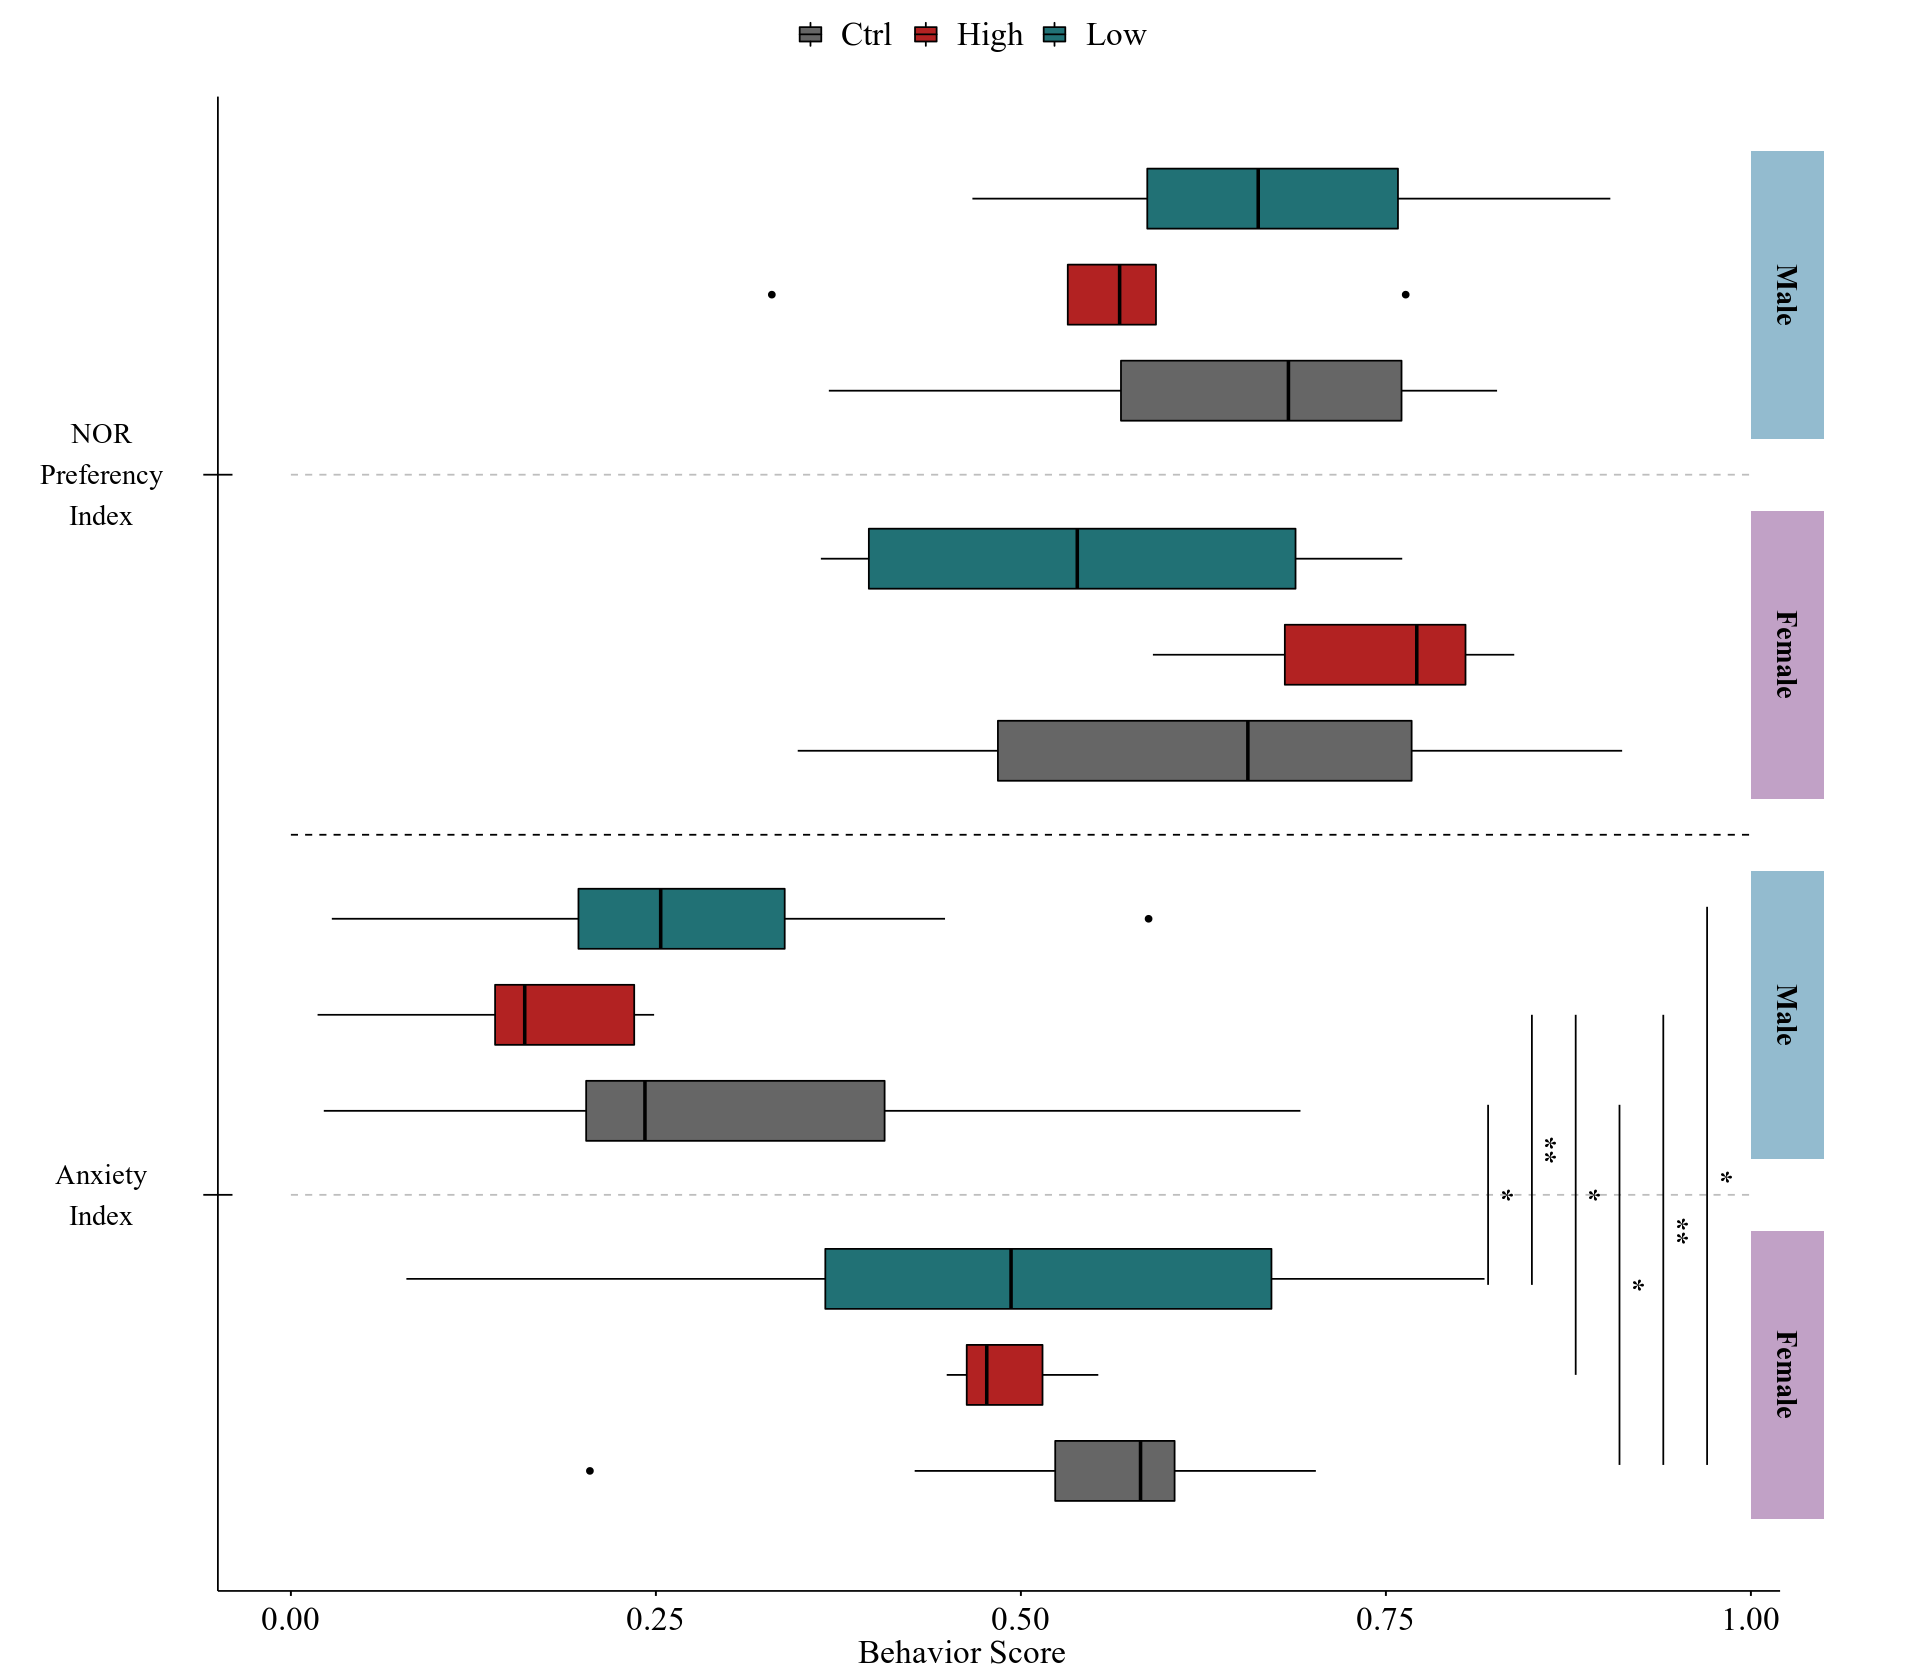

In [54]:
Fig.Behavior <- ggboxplot(Behavior3, x = "Behavior_sex", y = "Behavior Score",
          fill = "class", width = 0.5,
          #add = "dotplot", 
          color = "black",
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=3.5,y=-0.13,label="NOR\nPreferency\nIndex", size = 6, family = "Times New Roman") +
    annotate("text",x=1.5,y=-0.13,label="Anxiety\nIndex", size = 6, family = "Times New Roman") + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) +
    annotate(geom = "text", x = 1, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate("segment", x = 0.75, xend = 2.3, y = 0.97, yend = 0.97, colour = "black", linetype=1) +
    annotate("segment", x = 0.75, xend = 2.0, y = 0.94, yend = 0.94, colour = "black", linetype=1) +
    annotate("segment", x = 0.75, xend = 1.75, y = 0.91, yend = 0.91, colour = "black", linetype=1) +
    annotate("segment", x = 1.0, xend = 2.0, y = 0.88, yend = 0.88, colour = "black", linetype=1) +
    annotate("segment", x = 1.25, xend = 2.0, y = 0.85, yend = 0.85, colour = "black", linetype=1) +
    annotate("segment", x = 1.25, xend = 1.75, y = 0.82, yend = 0.82, colour = "black", linetype=1) +
    annotate(geom = "text", x = 1.55, y = 0.98,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.4, y = 0.95,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.25, y = 0.92,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.5, y = 0.89,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.625, y = 0.86,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 1.5, y = 0.83,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    theme(axis.title.y = element_blank(), text = element_text(size=20, family = "Times New Roman"), 
          legend.text = element_text(size=20, family = "Times New Roman"),legend.title=element_blank(),
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )
Fig.Behavior

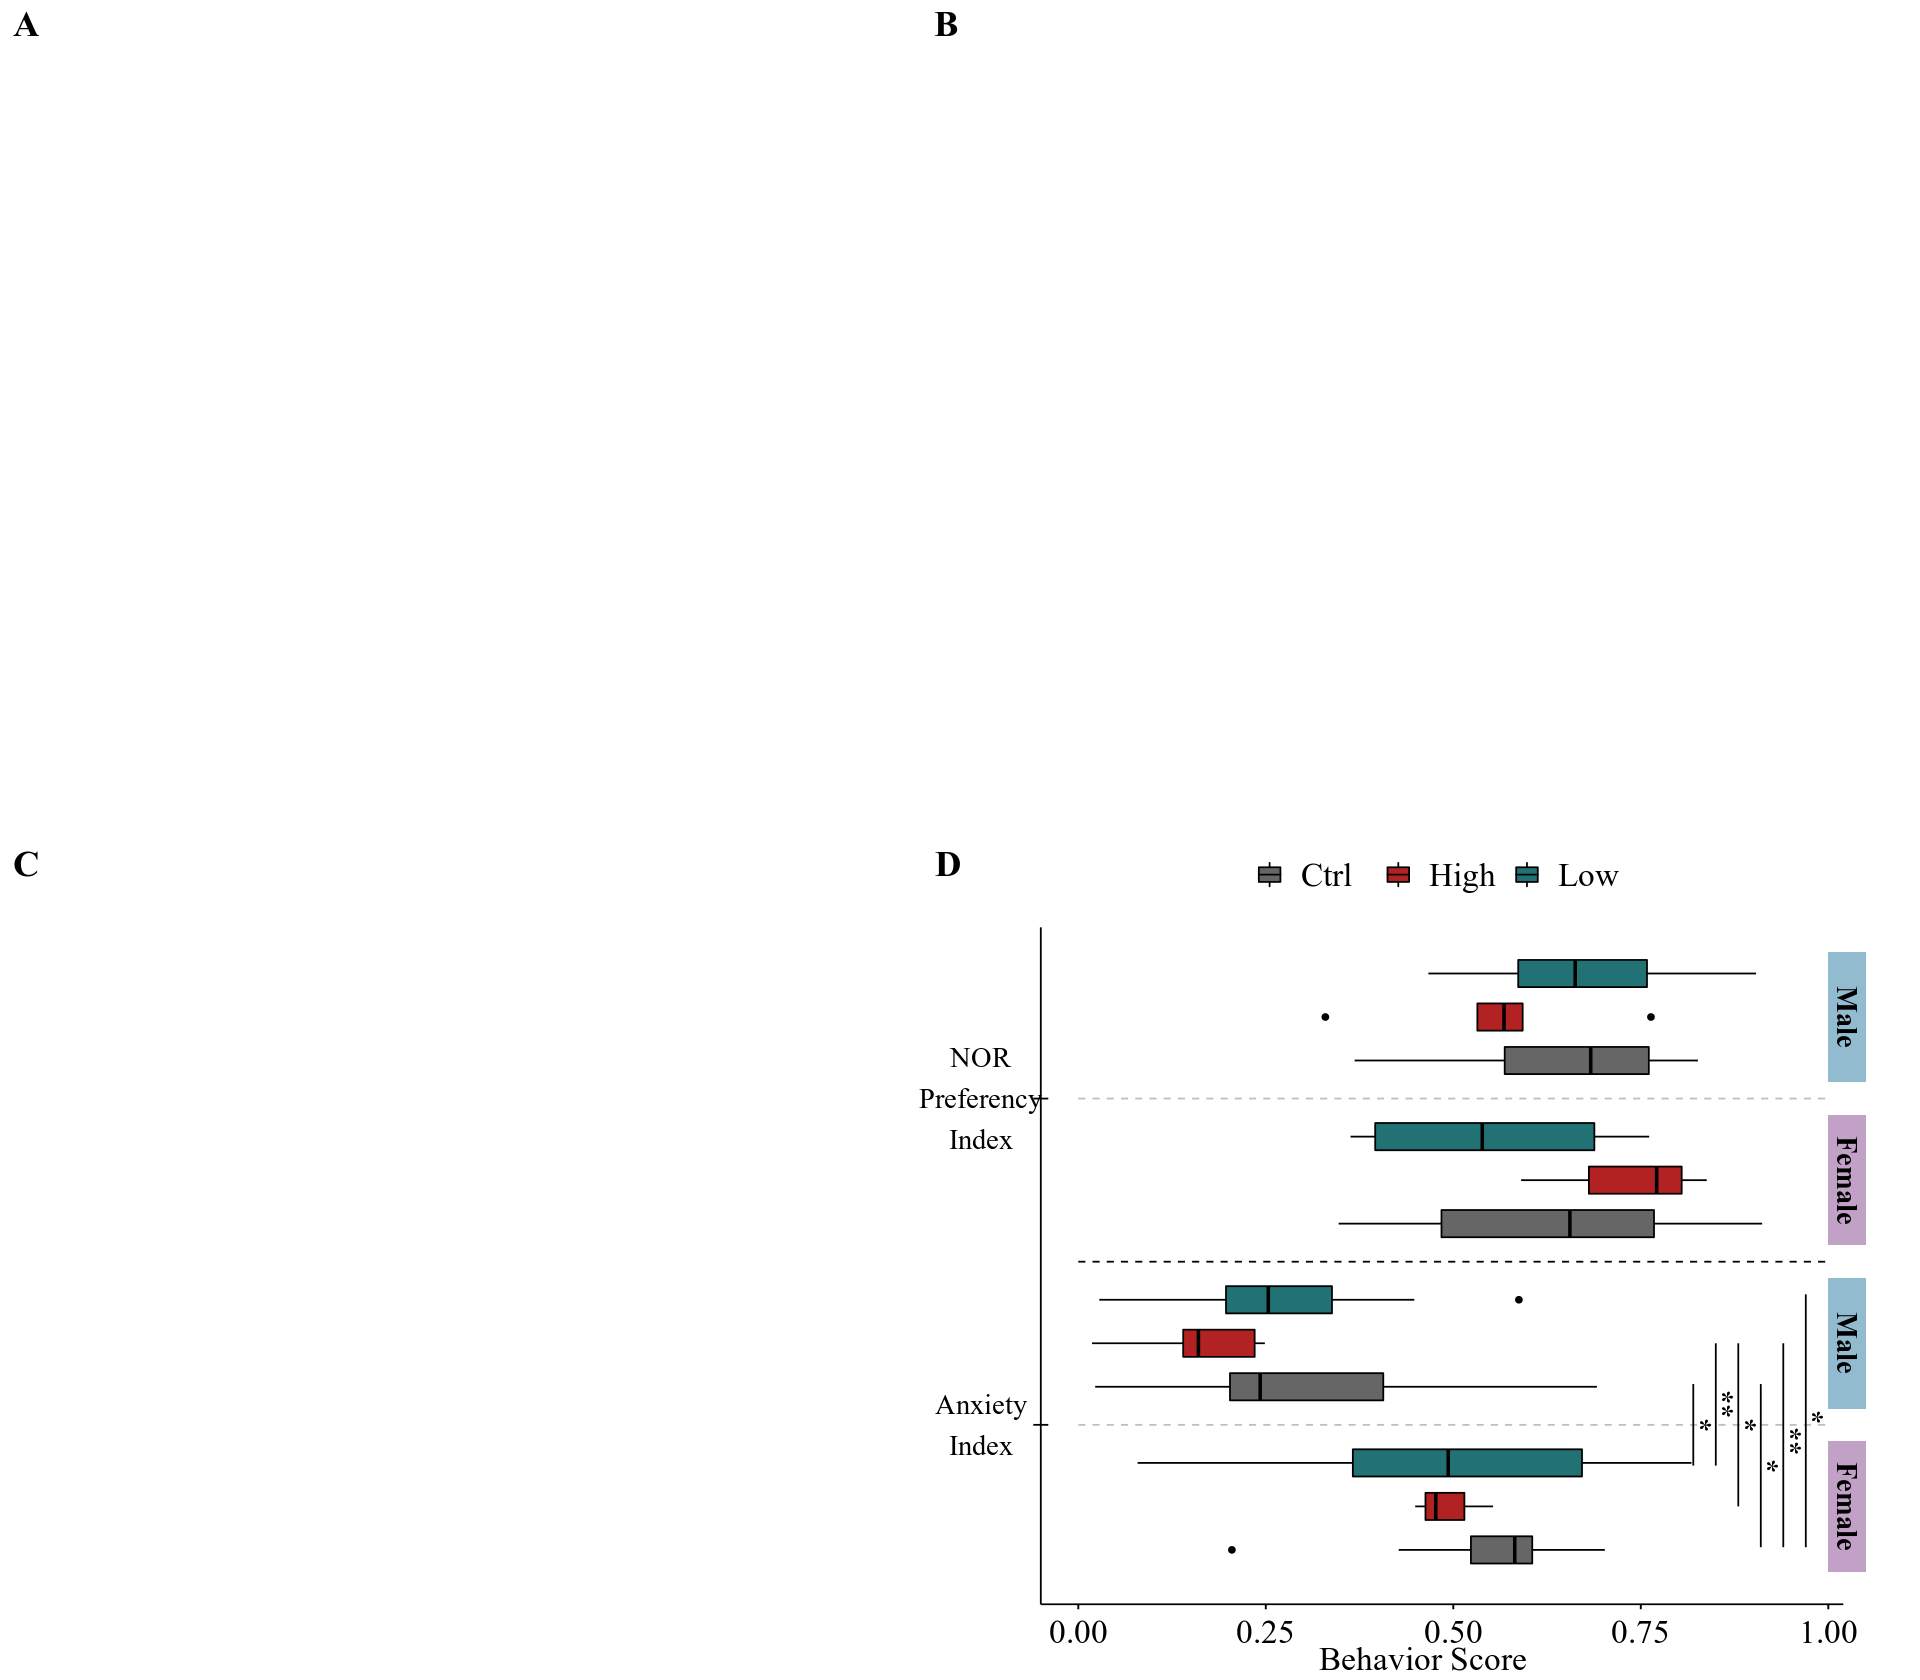

In [55]:
Fig.BehCD <- ggarrange(geom_blank(), geom_blank(), geom_blank(), Fig.Behavior, ncol = 2, nrow = 2,
          font.label=list(color="black",size=22,face="bold", family = "Times New Roman"),
          widths = c(1.2,1.3), labels = c("A","B","C","D"))
Fig.BehCD

## **Export Figures**

In [74]:
ggsave(plot = Fig.Behavior, dpi=300,height = 9, width = 11,bg="white",
       filename = "Figures/DLC/DLC_Results.png")

In [75]:
dir.create("Figures/Final_Figures")

In [83]:
ggsave(plot = Fig.Design, dpi=300,height = 11, width = 15,bg="white",
       filename = "Figures/Final_Figures/Fig_Design.png")

In [70]:
ggsave(plot = Fig.Consumption, dpi=300,height = 12, width = 15,bg="white",
       filename = "Figures/Final_Figures/Fig_Consumption.png")

In [ ]:
ggsave(plot = Fig.DLC, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/Final_Figures/Fig_DLC_lab.png")

In [ ]:
ggsave(plot = Fig.BehCD, dpi=300,height = 14, width = 16.5,bg="white",
       filename = "Figures/Final_Figures/Fig_BehCD.png")